<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

##  InstitutoTecnológico y de Estudios Superiores de Occidente ###
##  Maestría Ciencia de Datos  ###
##  Investigación, desarrollo e inovación II ###
##  Proyecto: resolviendo la función inversa para calcular la volatilidad implícita  ##

<br>
<br>

* * *

Estudiante: Daniel Nuño <br>
Profesor: Dr. Fernando Becerra <br>
Fecha entrega: 29 Noviembre, 2021 <br>

* * *


## Resumen ##

Probablemente la tarea numérica ejecutada con mayor frecuencia en la matemática financiera práctica es el cálculo de la volatilidad implícita consistente con un subyacente, precio convenido, tiempo de vencimiento y precio de mercado observable para opciones tipo europea vainilla de compra y venta. Al mismo tiempo, esta tarea es probablemente también la menos documentada en matemáticas financieras aplicadas. En este documento, es explicado no es tan fácil como uno podría pensar implementar una función de volatilidad implícita que sea a la vez eficiente y robusto, y se sugiere una posible solución. <br>

La solución y el código es implementado en Python 3.

## Introducción ##
#### Entendiendo de que es una opción financiera y por qué son importantes ####

Una opción es un instrumento financiero derivado que se establece en un contrato que da a su comprador el derecho, pero no la obligación, a comprar o vender el activo subyacente, que pueden ser acciones, bonos, índices bursátiles, futuros, etc., a un precio predeterminado hasta una fecha concreta.

Los contratos similares a las opciones se han utilizado desde la antigüedad. El primer comprador de opciones de renombre fue el antiguo matemático y filósofo griego Tales de Mileto. En cierta ocasión, se predijo que la cosecha de aceitunas de la temporada sería mayor de lo habitual y fuera de temporada, entonces adquirió el derecho a utilizar varias prensas de aceitunas la primavera siguiente. Cuando llegó la primavera y la cosecha de aceitunas fue mayor de lo esperado, ejerció sus opciones y luego alquiló las prensas a un precio mucho más alto de lo que pagó por el contrato.

Las opciones por su naturaleza y la intención de su creación son una forma de disminuir el riesgo y ser neutrales, pero también son direccionales. Desde la llegada de ingeniería financiera, los modelos teóricos para calcular su valor y, la facilidad de conectar vendedores y compradores el volumen de las opciones ha crecido exponencialmente.

Al ser direccionales el trader intradía está obsesionado por utilizar opciones alcistas para especular con las acciones está afectando a la antigua relación entre el mercado de valores de EE. UU. y su índice de volatilidad de referencia VIX, nunca había tenido una correlación negativa [1]. La última señal proviene del mercado algo oscuro de opciones sobre acciones, dónde los operadores pueden hacer apuestas que una acción subirá o bajará. La especulación ha alcanzado un nivel frenético nunca visto desde el final del boom de las puntocom hace dos décadas. Ese entusiasmo está teniendo una influencia creciente sobre el propio mercado de valores [2]. 

El comercio de opciones alcanzó un récord en 2020, con unos 7,47 mil millones de contratos negociados, según Options Clearing Corporation. Eso fue un 45 por ciento más alto que el récord anterior, establecido en 2018 [2].

Los brokers y market makers, quien conecta compradores y vendedores, ganan dinero cobrando tarifas a los productos, no prediciendo a dónde van los precios de las acciones. Entonces, para cubrir su riesgo en un contrato dado, compran un porcentaje calculado de las acciones que se verían obligados a vender si el comprador terminara ganando dinero con la apuesta. Pero a medida que suben los precios de las acciones, los brokers deben comprar más acciones para mantener sus coberturas en equilibrio y en orden respecto a los controles de riesgo. Y comprar más acciones ayuda a hacer subir los precios de las acciones.

Los precios de las acciones descuentan los flujos de efectivo futuros esperados de las empresas, piensan los principiantes ingenuos, pero aquellos que están ilustrados saben que los precios de las acciones son en realidad un efecto secundario de las opciones call semanales. Todo esto gracias a la dinámica del mercado. [3]

Más aún, la volatilidad implícita (VI), inerte en las primas de las opciones nos dicen mucho del futuro y las expectativas de los inversionistas. El término volatilidad implícita se refiere a una métrica que captura la opinión del mercado sobre la probabilidad de cambios en el precio de un valor determinado. Los inversores pueden utilizar la volatilidad implícita para proyectar movimientos futuros y oferta y demanda, y a menudo emplearla para fijar precios en contratos de opciones. La volatilidad implícita no es lo mismo que la volatilidad histórica (también conocida como volatilidad realizada o volatilidad estadística), que mide los cambios pasados del mercado y sus resultados reales.

Como referencia, la volatilidad implícita e histórica también es estocástica y eso significa que no es constante a través del tiempo, no es determinística y sigue un proceso aleatorio. La volatilidad implícita se denota con $ \sigma $. A menudo se puede pensar que es un indicador del riesgo de mercado. Se expresa comúnmente usando porcentajes y desviaciones estándar durante un horizonte de tiempo específico.

La volatilidad implícita *generalmente* aumenta en los mercados bajistas, cuando los inversores creen que los precios de las acciones disminuirán con el tiempo. VI disminuye cuando el mercado es alcista. Aquí es cuando los inversores creen que los precios subirán con el tiempo. Aunque VI no predice la dirección en la que procederá el cambio de precio. Por ejemplo, una alta volatilidad significa una gran oscilación del precio, pero el precio podría oscilar hacia arriba (muy alto), hacia abajo (muy bajo) o fluctuar entre las dos direcciones. La baja volatilidad significa que es probable que el precio no realice cambios amplios e impredecibles.

#### Objetivo ####

El objetivo es calcular la VI ya que es el único factor que no es directamente observable en el mercado. Los modelos matemáticos utilizan otros factores para determinar la volatilidad implícita y la prima teórica (precio) de la opción. En general, una función de valuación de opciones, $ f $, no tiene una solución a la inversa, $ g $. En su lugar, una técnica de resolución numérica de ecuaciones no lineales es usado para resolver la ecuación:
$$ f(\sigma_{\hat{V}}, \cdot ) - \hat{V} = 0 $$

Porqué los precios de las opciones de mueven muy rápido, globalmente, es muy importante utilizar el método más eficiente cuando se busca la volatilidad implícita. Este proyecto busca primordialmente resolver y encontrar la raíz para calcular la volatilidad implícita de opciones estilo europeo en el mercado estadounidense y mexicano que sean calculadas con los métodos Black-scholes o binomial.

#### Dinámica de las opciones ####

De la forma más básica existen 2 opciones, call y put. En cada contrato hay dos partes, quien la compra obtiene los derechos, paga la prima y se le llama long, y quien la vende recibe las obligaciones y la prima se llama short. <br>
La prima es la compensación por el riesgo y probabilidades que la opción sea ejercida. <br>

![payoff](https://d2a032ejo53cab.cloudfront.net/Glossary/LIrLWZpM/Optionpayoff.PNG)

Hay varios estilos de opciones, las más comunes son europeas y americanas que se diferencian una de otra por el momento en el que pueden ser ejercidas. Las europeas solo pueden ser ejercidas en la fecha del vencimiento, mientras que las americanas pueden ser ejercidas en cualquier momento entre el día de compra y el día de vencimiento.

En el mercado, el precio (prima) de las opciones se negocia en función de la ley de oferta y demanda que establece el mercado. Cualquiera en base a sus creencias y expectativas puede poner precio a la compra o venta del contrato. No obstante, existen modelos teóricos que tratan de determinar el precio de la opción en función de una serie de parámetros.

#### Valuación teórica de opciones ####

Black–Scholes utiliza lo siguiente:<br>
Relacionados con el mercado y general:<br>
- $t$, un tiempo en años; generalmente usamos $ \displaystyle t = 0 $ como ahora hoy;
- $r$, la tasa de interés libre de riesgo anualizada, compuesta continuamente también conocida como la fuerza del interés;

Relacionado al activo subyacente:<br>
- $ S(t) $, el precio del subyacente en tiempo t, es el precio spot;
- $ \mu $, drift rate de $ S $, anualizado;
- $ \sigma $, la desviación estándar de los retornos, una medida de su volatilidad;<br>

Relacionado a la opción:<br>
- $V(S,t)$, el precio de la opción en función del activo subyacente $ S $, en el momento $t$;
- $C(S,t)$, el precio de una opción call europea;
- $P(S,t)$, el precio de una opción put europea;
- $T$, tiempo a expiración;
- $\tau$, tiempo faltante hasta la expiración, que es igual a $ \tau = T - t$;
- $K$, el precio pactado de ejercicio del subyacente, conocido como strike

$ N(x) $ denota la función de distribución acumulativa normal estándar, <br>

$$ N(x) = \frac{1}{\sqrt{2\pi }}\int_{-\infty}^{x}e^{-x^{2}/2} dx $$

$ N'(x) $ denota la función de densidad de probabilidad como
$$ N'(x) = \frac{\partial dN(x)}{\partial x} = \frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}} $$

Otros autores y referencias incluidas en este proyecto denotan la función de densidad de probabilidad de la distribución normal como $\phi $.

Ahora, la ecuación diferencial parcial que describe el precio de la opción a lo largo del tiempo es:<br>

$$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^{2}S^{2}\frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV$$

La idea financiera clave detrás de la ecuación es que se puede cubrir perfectamente la opción comprando y vendiendo el activo subyacente y el activo de la cuenta bancaria (efectivo) de la manera correcta y, en consecuencia, eliminar el riesgo. Esta cobertura, a su vez, implica que solo hay un precio correcto para la opción, como lo devuelve la fórmula de Black-Scholes.

La fórmula Black-Scholes calcula el precio de las opciones put y call europeas. Este precio es consistente con la ecuación de Black-Scholes anterior; esto se sigue, ya que la fórmula se puede obtener resolviendo la ecuación para las condiciones terminales y de limite correspondientes:

$C(0, t) = 0$ para todo t <br>
$C(S, t) \rightarrow S $ como $ S \rightarrow \infty $ <br>
$C(S, t) = max\left \{ S-K,0 \right \}$ <br>

El valor de una opción de compra para una acción subyacente que no paga dividendos en términos de los parámetros de Black-Scholes es:<br>
$$C(S_{t}, t) = N(d_{1})S_{t} - N(d_{2})Ke^{-r\tau}$$

$$d_{1} = \frac{1}{\sigma\sqrt{\tau}}\left [ln(\frac{S_{t}}{K}) + (r+\frac{\sigma^{2}}{2})(\tau)  \right ]$$

$$d_{2} = d_{1} - \sigma\sqrt{\tau}$$
<br>
El precio de una opción de venta correspondiente basado en la paridad de compra-venta con factor de descuento $ e^{-r \tau} $ es:
$$ P(S_{t}, t) = Ke^{-r\tau}- S_{t} + C(S_{t}, t) $$

$$ P(S_{t}, t) = N(-d_{2})Ke^{-r\tau}- N(-d_{1})S_{t} $$

La introducción de algunas variables auxiliares permite simplificar y reformular la ecuación en una forma que a menudo es más conveniente y excepto que el precio spot del subyacente se reemplaza por un precio de futuros descontado F. Conocida como Black '76:

$$C (F, t) = D[N(d_{1})F - N(d_{2})K]$$

$$d_{1} = \frac{1}{\sigma\sqrt{\tau}}[ln(\frac{F}{K})+\frac{1}{2}\sigma^{2}\tau] $$

$$d_{2} = d_{1} - \sigma\sqrt{\tau}$$

Las variables auxiliares son:

$ D = e^{-r\tau} $ es el factor de descuento

$ F = e^{r\tau}S = \frac{S}{D} $

$ S = DF $

Otra forma de interpretar la ecuación es descomponiendo un call en la diferencia de dos opciones binarias: un call de asset-or-nothing menos un call de cash-or-nothing (largo un call asset-or-nothing, corto un call cash-or-nothing). La fórmula de Black-Scholes es una diferencia de dos términos, y estos dos términos son iguales a los valores de las opciones de compra binarias.

## Desarrollo ##

Teniendo la ecuación para un call, 
$$C(S_{t}, t) = N(d_{1})S_{t} - N(d_{2})Ke^{-r\tau}$$
dónde,
$$d_{1} = \frac{1}{\sigma\sqrt{\tau}}\left [ln(\frac{S_{t}}{K}) + (r+\frac{\sigma^{2}}{2})(\tau)  \right ]$$
y,
$$d_{2} = d_{1} - \sigma\sqrt{\tau}$$
el valor de la volatilidad implícita es $ \sigma $.

Lo más sencillo es un método iterativo de búsqueda que iguale el precio del contrato con el precio teórico. Dados los parámetros fijos, ingresando diferentes valores de $ \sigma $ en el modelo Black. 
Suponga que el valor de una opción para HP Inc. (HPQ) es \\$3.23 cuando el precio de las acciones es \\$83.11, el precio de ejercicio es \\$80, la tasa libre de riesgo es 0.25\% y el tiempo hasta el vencimiento es un día.

Por ejemplo, comience probando una volatilidad implícita de 0.3. Esto da el valor de la opción de \\$3.14, que es demasiado bajo. Dado que las opciones de compra son una función creciente, la volatilidad debe ser mayor. A continuación, intente 0.6 para la volatilidad; eso da un valor de \\$3.37 para la opción, que es demasiado alto. Intentar 0.45 para la volatilidad implícita produce \\$3.20 por el precio de la opción, por lo que la volatilidad implícita está entre 0.45 y 0.6. El procedimiento de búsqueda iterativa se puede realizar varias veces para calcular la volatilidad implícita. En este ejemplo, la volatilidad implícita es 0.46825 o 46.825\%.

Es una solución, pero no la mejor. Entonces podemos usar el método de Newton para encontrar dónde el precio y el precio teórico en función de $ \sigma $ igualan a cero, como en el objetivo del documento, pero enfocado a una call y con la notación de todos los parámetros:
$$ C(S,K,\sigma_{\hat{C}},\tau , r) - \hat{C} = 0 $$

$\hat{C} $ es el precio de la opción en el mercado. 

Método de Newton requiere la primera derivada parcial del valor teórico de la opción con respecto a la volatilidad del subyacente, también llamada vega. Vega generalmente se expresa como la cantidad de dinero que el valor de la opción ganará o perderá a medida que la volatilidad aumente o disminuya en 1 punto porcentual. Es la razón de cambio del precio de una opción europea con respecto a la volatilidad del subyacente. Todas las opciones (tanto call como put) ganarán valor con el aumento de la volatilidad. Se calcula como

$$ \frac{\partial C }{\partial \sigma} = S_{t}N'(d_{1})\frac{\partial d_{1}}{\partial \sigma}-Ke^{-r\tau}N'(d_{2})\frac{\partial d_{2}}{\partial \sigma} $$

$$ \frac{\partial d_{2}}{\partial \sigma} = \frac{\partial d_{1}}{\partial \sigma} - \sqrt{\tau} $$

En consecuencia,

$$ \frac{\partial C }{\partial \sigma} \equiv (S_{t}N'(d_{1})-Ke^{-r\tau}N'(d_{2}))\frac{\partial d_{1}}{\partial \sigma} + Ke^{-r\tau}N'(d_{2})\sqrt{\tau} $$

$$ \frac{\partial C }{\partial \sigma} = Ke^{-r\tau}N'(d_{2})\sqrt{\tau} $$

Equivalentemente,

$$ \frac{\partial C }{\partial \sigma} = S_{t}N'(d_{1})\sqrt{\tau} > 0 $$

Existe una relación directa entre el precio de la opción y la volatilidad del subyacente.
Observe que si vega es grande, entonces un cambio en la volatilidad impacta significativamente el
precio de la opción.<br>

La ecuación del método de Newton con las ecuaciones anteriores queda como
$$ \sigma_{n+1} = \sigma_{n} - \frac{C(S,K,\sigma_{n},\tau, r)}{\frac{\partial C}{\partial \sigma}} $$

cada nueva $\sigma_{n+1} $ se evalúa en
$$ C(S,K,\sigma_{n+1},\tau, r) - \hat{C} = 0 $$

El código de Python:

In [24]:
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega
def implied_vol(S0, K, T, r, market_price, flag='c', tol=0.00001):
    """Calculating the implied volatility of an European option
        S0: stock price
        K: strike price
        T: time to maturity
        r: risk-free rate
        market_price: option price in market
    """
    max_iter = 200 #max no. of iterations
    vol_old = 0.3 #initial guess 

    for k in range(max_iter):
        bs_price = bs(flag, S0, K, T, r, vol_old)
        Cprime = vega(flag, S0, K, T, r, vol_old)*100
        C = bs_price - market_price

        vol_new = vol_old - C/Cprime
        new_bs_price = bs(flag, S0, K, T, r, vol_new)
        if (abs(vol_old-vol_new) < tol or abs(new_bs_price-market_price) < tol):
            break

        vol_old = vol_new

    implied_vol = vol_new
    return implied_vol, k

S0, K, t, r = 83.11, 80, 1/250, 0.025
market_price = 3.23
iv, iter = implied_vol(S0, K, t, r, market_price)
print("La volatilidad implicita {0:5.2f}, fue calculada con {1:.0f} iteraciones"
      .format(iv*100, iter))

La volatilidad implicita 46.83, fue calculada con 3 iteraciones


La librería *py_vollib* ya tiene incluido dos cálculos  que facilitan el código:
- black-Scholes, bs, que nos da el precio teorico.
- la derivada, vega, del modelo respecto a la volatilidad.

Con los datos del ejemplo previo, una exactitud de 0.00001 el resultado es 46.82% con 4 cifras significativas y tomó 5 iteraciones. En promedio este algoritmo tarda más de 3 iteraciones y 0.5 segundos.

Es importante entender que el precio teórico tiene un límite inferior, esté es cuando la volatilidad es 0, la volatilidad no pueden ser números negativos. Si el precio del mercado es menor al posible observado por BS la función regresa un warning/error (o múltiples) indicando que no se puede dividir entre cero y lo mejor que puedes hacer es considerar la VI es 0.

Observe la siguiente gráfica que expresa el precio crece en función de la volatilidad y el límite inferior es 3.11.

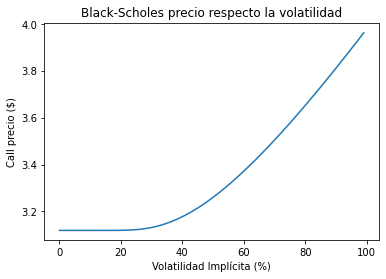

In [25]:
import matplotlib.pyplot as plt
bs_over_iv = [ bs('c', S0, K, t, r, iv/100) for iv in range(0,100,1) ]
plt.figure()
plt.plot(bs_over_iv)
plt.title('Black-Scholes precio respecto la volatilidad')
plt.xlabel('Volatilidad Implícita (%)')
plt.ylabel('Call precio ($)')
plt.show()

Peter Jackel en *Let's Be Rational* [7] explica que con su método calcula la volatilidad implícita a la precisión de la máquina alcanzable (punto flotante estándar de 64 bits) para todos los valores de entrada posibles en un tiempo de menos de microsegundos. El algoritmo comprende una conjetura inicial basada en expansiones asintóticas emparejadas, además dos pasos de mejora del método iterativo Householder (de orden de convergencia 4), lo que lo convierte en un procedimiento de tres pasos (es decir, no iterativo).

El punto de partida es obtener una comprensión fundamental de las dificultades involucradas, que se encuentran en gran parte el hecho de que la función Black no permite la expansión de Taylor alrededor de $ \hat{\sigma} = 0 $ cuando $F=K$.
- Defina cuatro segmentos para la función de estimación inicial, todos de los cuales utilizan aproximaciones racionales.
- Los segmentos más alto y bajo se definen mediante transformaciones no lineales que aseguran el comportamiento asintótico correcto de la función inicial a primer orden, no solo a la dominancia.
- Defina tres ramas para la función objetivo, basadas en el recíproco del logaritmo del precio para la rama inferior, el precio en sí en la rama media, y el logaritmo de la distancia entre el precio y su límite valor de volatilidad infinita para la rama superior.
- Usa dos iteraciones del método Householder de tercer orden, que es una función racional del objetivo residual y tiene un orden de convergencia cuatro.

La implementación y el código está en hecho originalmente en C++. El equipo de py_vollib, Gammon Capital LLC, crearon una implementación del proceso en Python [8]. Aunque muy certero y rápido, no parece ser muy eficiente para grandes vectores de datos.

El equipo de The Numerical Algorithms Group Inc. han diseñado la librería naginterfaces que usa el método diseñado por Kathrin Glau[10]. Este método utiliza la interpolación de Chebyshev y está diseñado para vectores grandes de datos, donde las instrucciones vectoriales Single instruction, multiple data (SIMD) pueden explotarse para mejorar el rendimiento. Para aplicaciones en las que no se requiere tanta precisión, el algoritmo puede ser instruido para que trabaje con una precisión simple (aproximadamente siete lugares decimales), lo que brinda aún más mejoras de rendimiento [9].

La siguiente función toma como entrada, los precios de mercado de las opciones call y put, (1) calcula la volatilidad implícita, (2) y gráfica la volatilidad respecto al preció strike.

La información usada para replicar el ejercicio está el archivo adjunto. En la práctica se usan conexiones directas a proveedores de datos como FactSet, Bloomber, Polygon o CBOE para trabajar con información nueva constantemente transmitida.

Son los datos de TSLA, calculados con un precio spot de 1132, tasa libre de riesgo 0.25%.

In [26]:
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega
from py_vollib.black_scholes.implied_volatility import implied_volatility
import pandas as pd
import seaborn as sns

def implied_vol(S0, K, T, r, market_price, flag='c', tol=0.00001):
    """Calculating the implied volatility of an European option
        S0: stock price
        K: strike price
        T: time to maturity
        r: risk-free rate
        market_price: option price in market
    """
    max_iter = 200 #max no. of iterations
    vol_old = 0.3 #initial guess 

    for k in range(max_iter):
        bs_price = bs(flag, S0, K, T, r, vol_old)
        Cprime = vega(flag, S0, K, T, r, vol_old)*100
        C = bs_price - market_price

        vol_new = vol_old - C/Cprime
        new_bs_price = bs(flag, S0, K, T, r, vol_new)
        if (abs(vol_old-vol_new) < tol or abs(new_bs_price-market_price) < tol):
            break

        vol_old = vol_new

    implied_vol = vol_new
    return implied_vol

S = 1132
r = 0.0025
data = pd.read_csv('C:/Users/nuno/OneDrive - ITESO/Ciencia de Datos'
                     '/idi_ii/tsla_options_last.csv')
iv_vctr_be_rational = []
for index, row in data.iterrows():
    if bs(row['type'], S, row['Strike'], row['tau'], r, 0) < row['Last Sale']:
        try:
            iv_vctr_be_rational.append(implied_volatility(row['Last Sale'],S,
                                                          row['Strike'],row['tau'],
                                                          r,row['type']))
        except:
            iv_vctr_be_rational.append(0)
    else:
        iv_vctr_be_rational.append(0)

In [27]:
iv_vctr_newton = []
for index, row in data.iterrows():
    try:
        if bs(row['type'], S, row['Strike'], row['tau'], r, 0) < row['Last Sale']:
            iv_vctr_newton.append(implied_vol(S,row['Strike'],row['tau'],
                                              r, row['Last Sale'],
                                              flag=row['type']))
        else:
            iv_vctr_newton.append(0)
    except:
        iv_vctr_newton.append(0)

C:\Users\nuno\AppData\Local\Temp/ipykernel_8792/3702330515.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  vol_new = vol_old - C/Cprime
C:\Users\nuno\AppData\Local\Temp/ipykernel_8792/3702330515.py:23: RuntimeWarning: overflow encountered in double_scalars
  vol_new = vol_old - C/Cprime


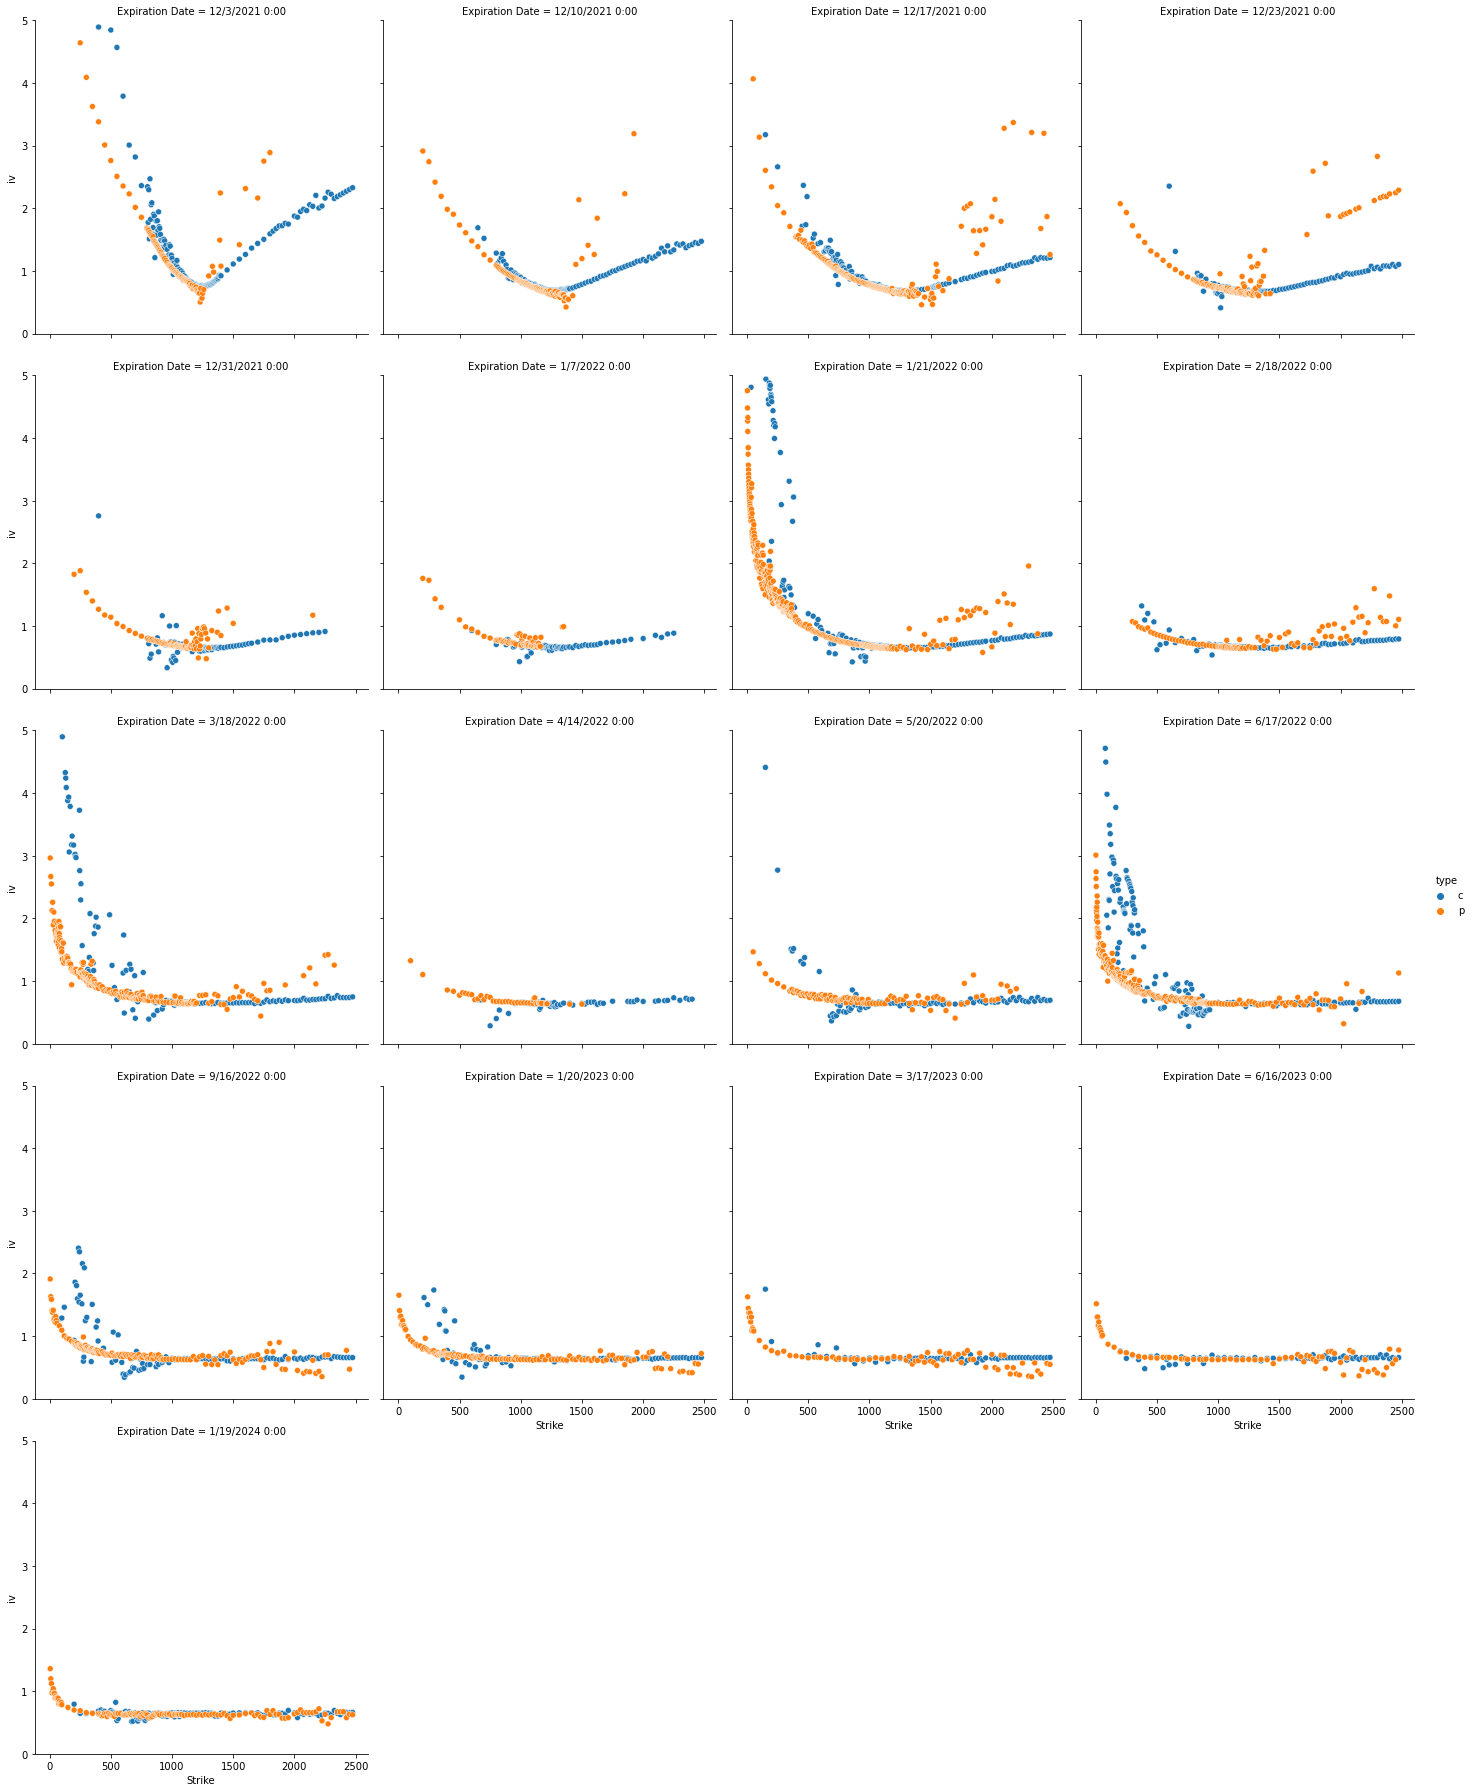

In [28]:
data['iv'] = iv_vctr_be_rational
sns.relplot(
    data=data[data.iv != 0], x='Strike', y='iv', hue='type',
    col='Expiration Date', kind='scatter', col_wrap=4
).set(ylim=(0, 5))

## Conclusiones ##

Las gráficas de volatilidad para TSLA nos indican que en el corto tiempo puede pasar cualquier cosa y tiene VI muy alta. En el largo plazo esperan que baje el precio de TSLA.

La volatilidad implícita es importante porqué, a diferencia de la volatilidad histórica, se entiende como la volatilidad al futuro hasta el vencimiento del contrato. Hoy en día el volumen y precio de las opciones esta modelando el precio del subyacente, y no el subyacente a las opciones. También es importante poder calcular correctamente y de la forma más rápida posible. Vimos el algoritmo para encontrar la VI con método Newton y obtuvimos uno de los resultados gráficos de calcular la VI.

Cuando inicie el proyecto no sabio que había otros desarrollos (son un tiempo después de cuando esta estudiando la licenciatura) y de ese nivel. El método de Newton queda como es el más sencillo de explicar y comprender como un método iterativo, pero no el más preciso ni más rápido. Es muy lento para conjuntos de datos más grandes y el algoritmo de Newton-Raphson depende en gran medida del valor inicial de la iteración, Para muchos parámetros estándar a menudo converge rápidamente, pero para parámetros más extremos, el número de pasos iterativos aumenta significativamente

Los desarrollos de los doctores Jackel y Glau son más precisos y más rápidos para encontrar la solución, pero también so mucho más complejos.

### Referencia bibliográfica ###

[1] Wang, L. (2021, November 8). Options Craze Rewriting Rules of VIX, S&P 500 Relationship. Bloomberg. Retrieved November 27, 2021, from https://www.bloomberg.com/news/articles/2021-11-08/options-craze-is-rewriting-rules-of-vix-s-p-500-relationship

[2] Phillips, M. (2021, January 26). How Options Trading Could Be Fueling a Stock Market Bubble. New York Times. Retrieved November 27, 2021, from https://www.nytimes.com/2021/01/25/business/stocks-options-bubble.html

[3] Levine, M. (2021, August 5). Money Stuff: Robinhood Is More Fun With Options. Bloomberg. Retrieved November 27, 2021, from https://www.bloomberg.com/news/newsletters/2021-08-05/money-stuff-robinhood-is-more-fun-with-options

[4] Venegas-Martínez, F. (2008). Riesgos financieros y económicos (Second ed.). Cengage Learning.

[5] Derman, E., & Miller, M. B. (2016). The Volatility Smile (First ed.). Wiley Finance.

[6] Jackel, P. (2010). By Implication. Wiley. http://www.jaeckel.org/ByImplication.pdf

[7] Jackel, P. (2015). Let’s Be Rational. Wiley. http://www.jaeckel.org/LetsBeRational.pdf

[8] Gamma Group, LLC. Documentation py_vollib. Vollib.Org. Retrieved November 29, 2021, from https://vollib.org/documentation/python/1.0.2

[9] Hopkins, E. (2021, April 21). Implied volatility using pythons pandas library. NAG. Retrieved November 29, 2021, from https://www.nag.com/blog/implied-volatility-using-pythons-pandas-library

[10] Glau, K., Herold, P. H., Madan, D. B., & Potz, C. (2017). The Chebyshev method for the implied volatility. ArXiv.Org. Published. https://arxiv.org/pdf/1710.01797.pdf

### Apéndice ###
#### Código python ####
```
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega
def implied_vol(S0, K, T, r, market_price, flag='c', tol=0.00001):
    """Calculating the implied volatility of an European option
        S0: stock price
        K: strike price
        T: time to maturity
        r: risk-free rate
        market_price: option price in market
    """
    max_iter = 200 #max no. of iterations
    vol_old = 0.3 #initial guess 

    for k in range(max_iter):
        bs_price = bs(flag, S0, K, T, r, vol_old)
        Cprime = vega(flag, S0, K, T, r, vol_old)*100
        C = bs_price - market_price

        vol_new = vol_old - C/Cprime
        new_bs_price = bs(flag, S0, K, T, r, vol_new)
        if (abs(vol_old-vol_new) < tol or abs(new_bs_price-market_price) < tol):
            break

        vol_old = vol_new

    implied_vol = vol_new
    return implied_vol, k

S0, K, t, r = 83.11, 80, 1/250, 0.025
market_price = 3.23
iv, iter = implied_vol(S0, K, t, r, market_price)
print("La volatilidad implicita {0:5.2f}, fue calculada con {1:.0f} iteraciones"
      .format(iv*100, iter))
      
import matplotlib.pyplot as plt
bs_over_iv = [ bs('c', S0, K, t, r, iv/100) for iv in range(0,100,1) ]
plt.figure()
plt.plot(bs_over_iv)
plt.title('Black-Scholes precio respecto la volatilidad')
plt.xlabel('Volatilidad Implícita (%)')
plt.ylabel('Call precio ($)')
plt.show()


from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega
from py_vollib.black_scholes.implied_volatility import implied_volatility
import pandas as pd
import seaborn as sns

def implied_vol(S0, K, T, r, market_price, flag='c', tol=0.00001):
    """Calculating the implied volatility of an European option
        S0: stock price
        K: strike price
        T: time to maturity
        r: risk-free rate
        market_price: option price in market
    """
    max_iter = 200 #max no. of iterations
    vol_old = 0.3 #initial guess 

    for k in range(max_iter):
        bs_price = bs(flag, S0, K, T, r, vol_old)
        Cprime = vega(flag, S0, K, T, r, vol_old)*100
        C = bs_price - market_price

        vol_new = vol_old - C/Cprime
        new_bs_price = bs(flag, S0, K, T, r, vol_new)
        if (abs(vol_old-vol_new) < tol or abs(new_bs_price-market_price) < tol):
            break

        vol_old = vol_new

    implied_vol = vol_new
    return implied_vol

S = 1132
r = 0.0025
data = pd.read_csv('C:/Users/nuno/OneDrive - ITESO/Ciencia de Datos'
                     '/idi_ii/tsla_options_last.csv')
iv_vctr_be_rational = []
for index, row in data.iterrows():
    if bs(row['type'], S, row['Strike'], row['tau'], r, 0) < row['Last Sale']:
        try:
            iv_vctr_be_rational.append(implied_volatility(row['Last Sale'],S,
                                                          row['Strike'],row['tau'],
                                                          r,row['type']))
        except:
            iv_vctr_be_rational.append(0)
    else:
        iv_vctr_be_rational.append(0)

iv_vctr_newton = []
for index, row in data.iterrows():
    try:
        if bs(row['type'], S, row['Strike'], row['tau'], r, 0) < row['Last Sale']:
            iv_vctr_newton.append(implied_vol(S,row['Strike'],row['tau'],
                                              r, row['Last Sale'],
                                              flag=row['type']))
        else:
            iv_vctr_newton.append(0)
    except:
        iv_vctr_newton.append(0)

data['iv'] = iv_vctr_be_rational
sns.relplot(
    data=data[data.iv != 0], x='Strike', y='iv', hue='type',
    col='Expiration Date', kind='scatter', col_wrap=4
).set(ylim=(0, 5))

```

#### Datos ####

Los datos usados pueden ser descargados de aquí https://iteso01-my.sharepoint.com/:x:/g/personal/daniel_nuno_iteso_mx/ETL7aDEp9WZBircJXY6sh6wBRcKj-V6ZXRP_NtsdrX-xIQ?e=2Qpe9y

La fuente original es CBOE https://www.cboe.com/delayed_quotes/tsla/quote_table